<img src='img/logo.png'>
<img src='img/title.png'>

# Decision Trees and Random Forests

* decision trees successively divide the problem into regions
* random forests generally require little *feature engineering*

# Table of Contents
* [Decision Trees and Random Forests](#Decision-Trees-and-Random-Forests)
* [Setup](#Setup)
* [Classification Trees](#Classification-Trees)
	* [Important features](#Important-features)
	* [Visualization](#Visualization)
* [Predict salaries](#Predict-salaries)
* [Ensembles of trees](#Ensembles-of-trees)
	* [Random forest](#Random-forest)
		* [Feature importance](#Feature-importance)
	* [Gradient Boosting](#Gradient-Boosting)
		* [Important features](#Important-features)
	* [Ranking features](#Ranking-features)
* [Regression problems](#Regression-problems)
	* [Complexity vs generality](#Complexity-vs-generality)
	* [Ensembles](#Ensembles)


# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.mglearn as mglearn
%matplotlib inline

# Classification Trees

Decision for classification problems allow for complex relationships to be modeled. Decision trees are called *white box* models since the decision process, while possibly lengthy, can always be interpreted.

Further, decision trees evaluate features independently so they do not require normalization.

A decision tree is built like the game *20 Questions*. The total number of questions is called `max_depth`.

1. Choose a feature (A) and choose a dividing value to optimally separate the labels
2. In each region of A divide along a second feature (B) the same way.
3. Continue until
   * each new region contains 1 observation or observations of the same class.
   * or the number of questions has been exhausted.
   
The act of limiting the number of leaves is called *pruning*. Decision trees in scikit-learn can only be *pre-pruned*.

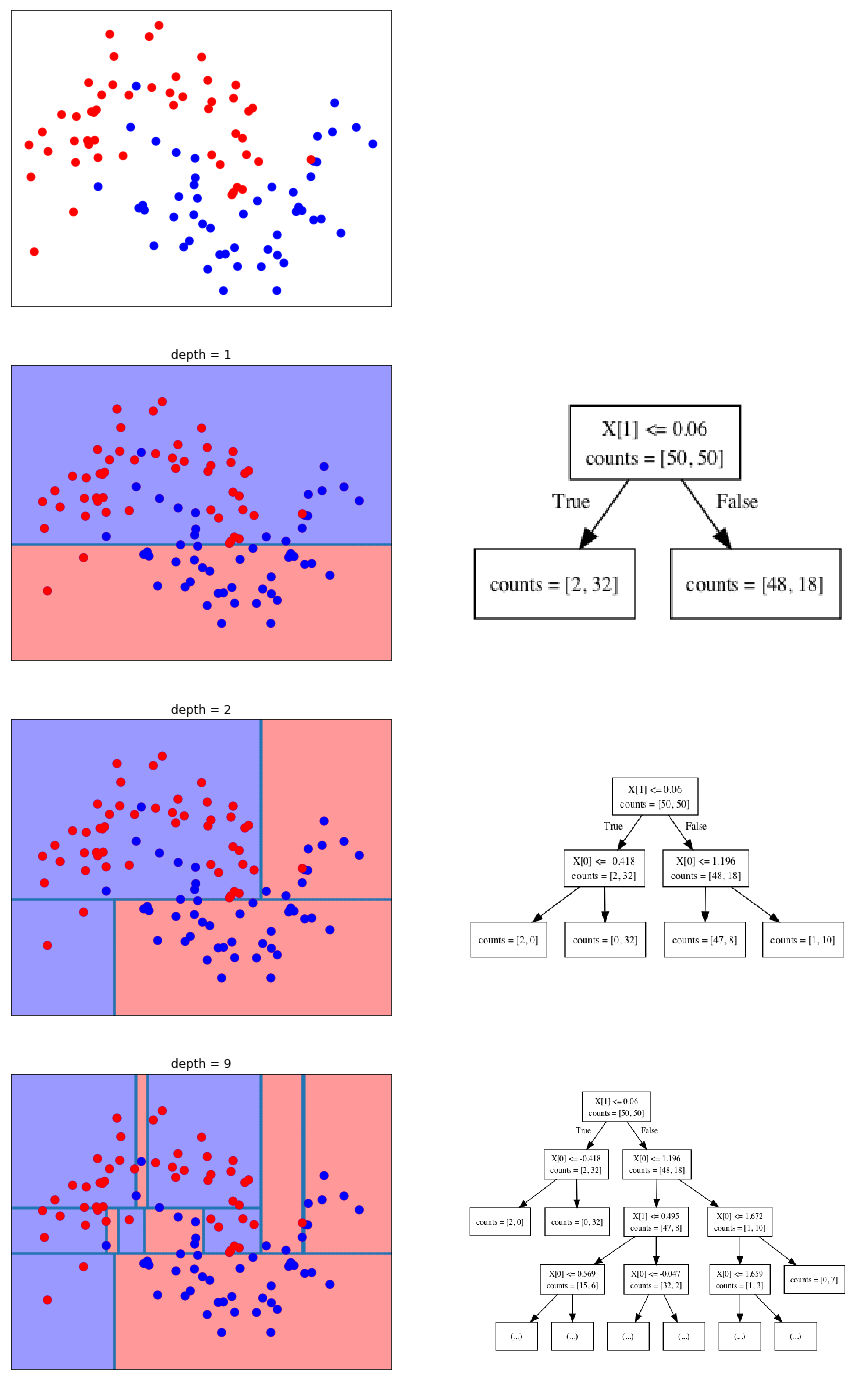

In [2]:
mglearn.plot_interactive_tree.plot_tree_progressive()

Let's try to use a decision tree to model survival from the Titanic.

In [3]:
titanic = pd.read_csv('data/titanic.csv').dropna()
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True

Like Naive Bayes models we need to encode categorical features as True/False.

In [4]:
features = ['class', 'age', 'deck', 'survived']
titanic_dummies = pd.get_dummies(titanic[features])
titanic_dummies.head()

age  survived  class_First  class_Second  class_Third  deck_A  deck_B  \
1   38.0         1            1             0            0       0       0   
3   35.0         1            1             0            0       0       0   
6   54.0         0            1             0            0       0       0   
10   4.0         1            0             0            1       0       0   
11  58.0         1            1             0            0       0       0   

    deck_C  deck_D  deck_E  deck_F  deck_G  
1        1       0       0       0       0  
3        1       0       0       0       0  
6        0       0       1       0       0  
10       0       0       0       0       1  
11       1       0       0       0       0

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic_dummies, random_state=0)

features = titanic_dummies.columns.drop('survived')

X_train = train[features]
X_test = test[features]
y_train = train['survived']
y_test = test['survived']

In [6]:
from sklearn.tree import DecisionTreeClassifier

The most important feature of a decision tree is the `max_depth`.

A decision tree with a large `max_depth`, while capable of defining every observation, is by definition *overfitted.*

1 0.6304347826086957 0.6985294117647058
2 0.6739130434782609 0.7279411764705882
3 0.6739130434782609 0.7867647058823529
4 0.6956521739130435 0.8014705882352942
5 0.6956521739130435 0.8161764705882353
6 0.6739130434782609 0.8602941176470589
7 0.6739130434782609 0.875
8 0.6521739130434783 0.8970588235294118
9 0.5 0.9044117647058824
10 0.5652173913043478 0.9117647058823529
11 0.5869565217391305 0.9338235294117647
12 0.5652173913043478 0.9411764705882353
13 0.5652173913043478 0.9485294117647058
14 0.5652173913043478 0.9485294117647058
15 0.5652173913043478 0.9485294117647058
16 0.5652173913043478 0.9485294117647058
17 0.5869565217391305 0.9485294117647058
18 0.5869565217391305 0.9485294117647058
19 0.5652173913043478 0.9485294117647058
20 0.5869565217391305 0.9485294117647058


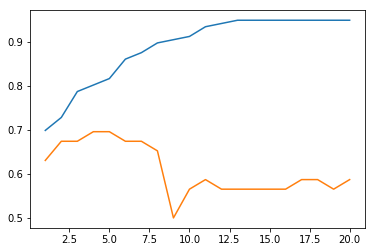

In [26]:
id_set = {}
val_set = {}
for i in np.arange(1,21):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    id_set[i] = tree.score(X_train, y_train)
    val_set[i] = tree.score(X_test, y_test)
    print(i, tree.score(X_test, y_test), tree.score(X_train, y_train))

plt.plot(np.arange(1,21), list(id_set.values()), np.arange(1,21), list(val_set.values()))

In [36]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Important features

By asking only three independent questions we can see which three features have most *decisive power*.

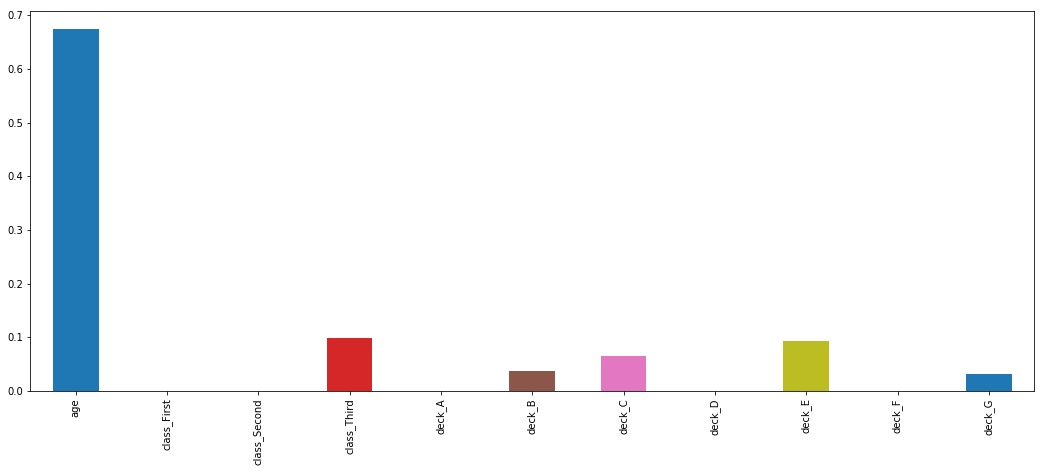

In [37]:
pd.Series(tree.feature_importances_, index=features).plot.bar(figsize=(18,7))

## Visualization

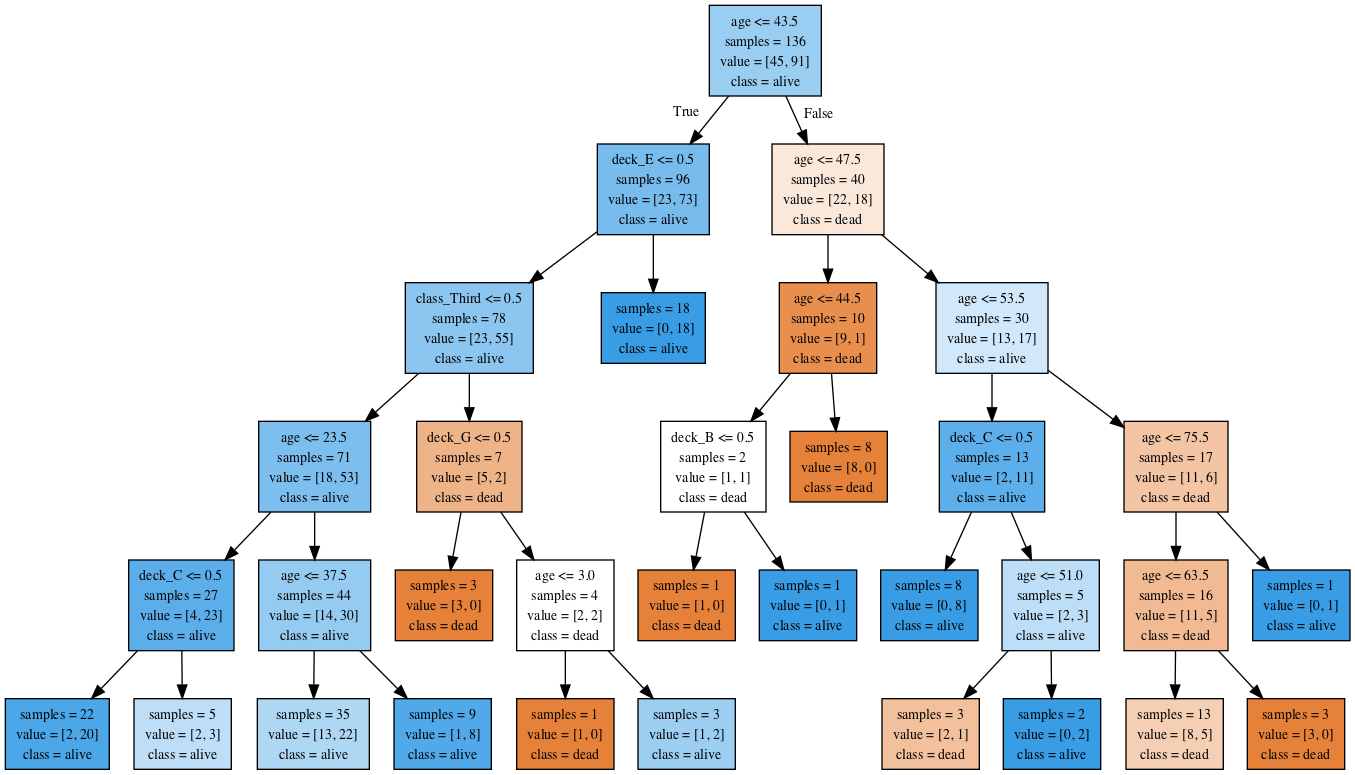

In [38]:
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=features, class_names=['dead','alive'],
                out_file='tmp/titanic.dot', impurity=False, filled=True)
subprocess.check_call([sys.prefix+'/bin/dot','-Tpng','tmp/titanic.dot','-o','tmp/titanic.png'])
Image('tmp/titanic.png')

# Predict salaries

Given a collection of demographic information. What are the most important features to predict whether someone makes more than $50,000 per year?

In [39]:
salaries = pd.read_csv('data/adult.csv', index_col=0)
salaries.head()

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K

In [40]:
salaries_dummies = pd.get_dummies(salaries).drop('income_ <=50K', axis='columns')
features = salaries_dummies.columns.drop('income_ >50K')

train, test = train_test_split(salaries_dummies, random_state=0)

X_train = train[features]
X_test = test[features]
y_train = train['income_ >50K']
y_test = test['income_ >50K']

Let's overfit a Decision Tree.

In [55]:
for d in range(1,20):
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    print(d, tree.score(X_train, y_train), tree.score(X_test, y_test))

1 0.76007371007371 0.7565409654833558
2 0.8286240786240786 0.8270482741677927
3 0.8443898443898444 0.8422798182041519
4 0.8444307944307944 0.8416656430413954
5 0.8474610974610974 0.8428939933669083
6 0.8558149058149058 0.8528436310035622
7 0.8591318591318591 0.8541948163616263
8 0.8623259623259624 0.8551774966220366
9 0.8654381654381654 0.8537034762314212
10 0.8701883701883701 0.8548089915243827
11 0.8753071253071253 0.8544404864267289
12 0.8805077805077806 0.8535806411988699
13 0.8859131859131859 0.8506326004176391
14 0.8920966420966421 0.8480530647340622
15 0.8991400491400492 0.8430168283994596
16 0.9033169533169533 0.8417884780739467
17 0.9112203112203112 0.8366294067067928
18 0.9186322686322687 0.8315931703721902
19 0.9235462735462735 0.8297506448839209


In [72]:
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The model is 98% accurate on the *training data*

In [68]:
tree.score(X_train, y_train)

0.9794840294840295

But 81% accurate on the testing data.

In [69]:
tree.score(X_test, y_test)

0.816361626335831

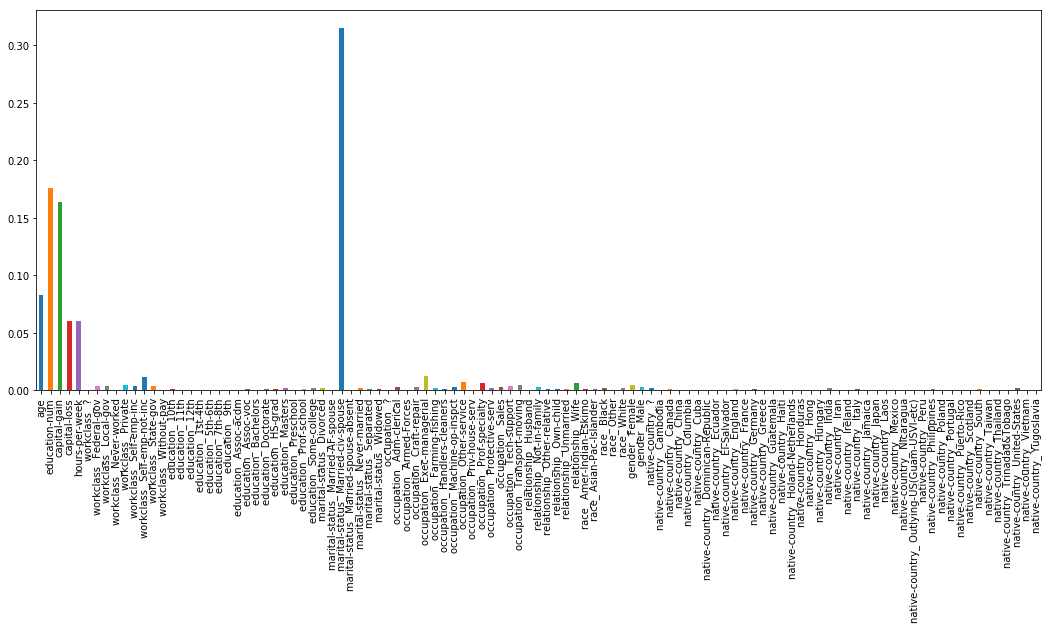

In [74]:
pd.Series(tree.feature_importances_, index=X_train.columns).plot.bar(figsize=(18,7));

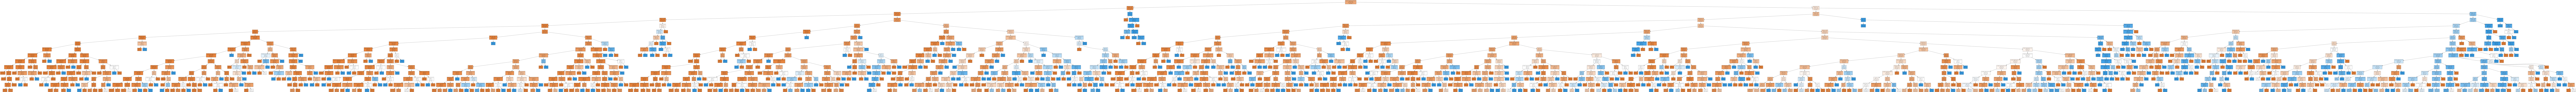

In [73]:
export_graphviz(tree, feature_names=features, class_names=['above','below'],
                out_file='tmp/sal.dot', impurity=False, filled=True)
subprocess.check_call([sys.prefix+'/bin/dot','-Tpng','tmp/sal.dot','-o','tmp/sal.png'])
Image('tmp/sal.png')

# Ensembles of trees

Ensemble models help reduce the effects of overfitting a single decision tree by creating an ensemble of *slightly different* decision trees.

* Trees can differ by
  * the subset of training data used to train
  * the subset of features used to train

## Random forest

Random forests build independent decision trees and by default each tree is given a random subset of the training data.

In [61]:
from sklearn.ensemble import RandomForestClassifier

`n_estimators` is total number of trees to fit. Here we'll let all of the Decision Trees overfit.

With this we get a test score slightly higher.

In [66]:
for i in range(1,20):
    rnd = RandomForestClassifier(n_estimators=i, random_state=0)
    rnd.fit(X_train, y_train)
    print(i, 'Training {}'.format(rnd.score(X_train, y_train)), 'Testing  {}'.format(rnd.score(X_test, y_test)))


1 Training 0.9174856674856675 Testing  0.8092371944478566
2 Training 0.9197379197379197 Testing  0.8221348728657413
3 Training 0.9498771498771499 Testing  0.8303648200466773
4 Training 0.9474201474201475 Testing  0.8317160054047414
5 Training 0.9593775593775594 Testing  0.8341727060557671
6 Training 0.9596642096642096 Testing  0.8411743029111902
7 Training 0.9653153153153153 Testing  0.8439995086598698
8 Training 0.9650696150696151 Testing  0.8443680137575237
9 Training 0.9693693693693693 Testing  0.8459648691806904
10 Training 0.9683865683865683 Testing  0.8455963640830365
11 Training 0.9715397215397216 Testing  0.8448593538877288
12 Training 0.9705569205569206 Testing  0.8465790443434468
13 Training 0.9732186732186732 Testing  0.8469475494411006
14 Training 0.9723996723996724 Testing  0.8470703844736519
15 Training 0.9742014742014742 Testing  0.8464562093108955
16 Training 0.9735872235872236 Testing  0.8459648691806904
17 Training 0.9748566748566748 Testing  0.8467018793759981
18 Tra

### Feature importance

Ensemble methods are generally more stable than decision trees and as such the feature importantces is highly reliable.

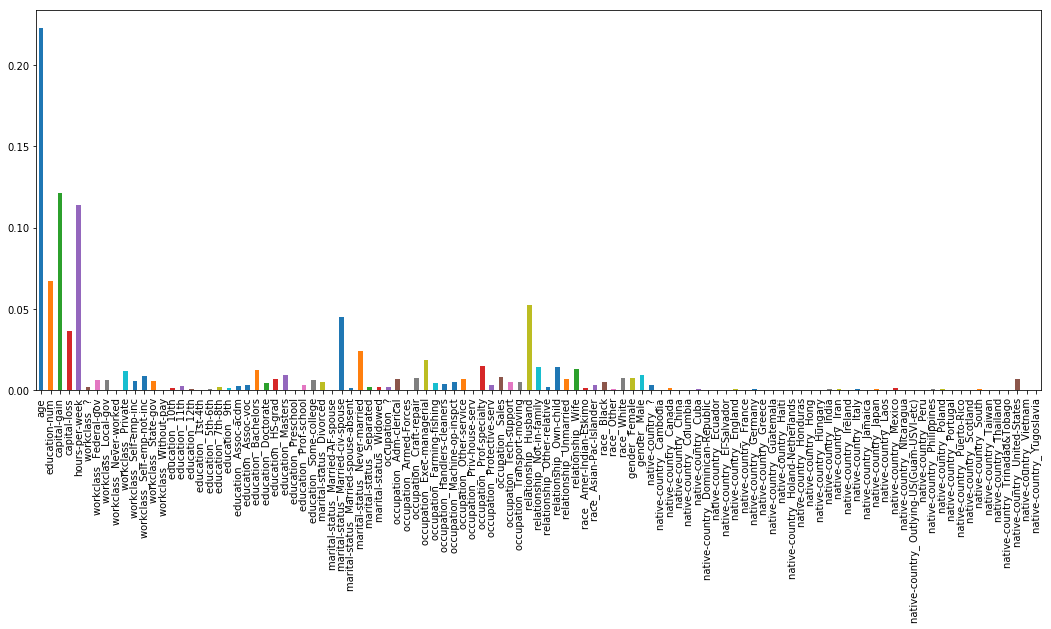

In [75]:
pd.Series(rnd.feature_importances_, index=X_train.columns).plot.bar(figsize=(18,7));

## Gradient Boosting

Gradient Boosting trees are built sequentially by correcting mistakes from the previous tree.

In Gradient Boosting each tree must be pre-pruned.

Caution: Gradient Boosting models can be slow to train.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

Like trees and forests `max_depth` controls the number of decision layers in each tree.

The `learning_rate` argument controls the strength of the corrects to each sequential tree.
* higher `learning_rate` can lead to a complex model and overfitting 
* lower `learning_rate` can lead to a general model and underfitting

The `n_estimators` parameter defaults to 100 trees.

In [77]:
gb = GradientBoostingClassifier(max_depth=2, learning_rate=0.01, n_estimators=100, random_state=0)

gb.fit(X_train, y_train)
print('Training {}'.format(gb.score(X_train, y_train)))
print('Testing  {}'.format(gb.score(X_test, y_test)))

Training 0.7983210483210483
Testing  0.7935143102812923


By changing max_depth, learning_rate and n_estimators we can improve the scores.

Caution: Gradient Boosting models can be sensitive to small changes in these parameters.

In [78]:
gb = GradientBoostingClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, random_state=0)

gb.fit(X_train, y_train)
print('Training {}'.format(gb.score(X_train, y_train)))
print('Testing  {}'.format(gb.score(X_test, y_test)))

Training 0.871007371007371
Testing  0.8638987839331778


### Important features

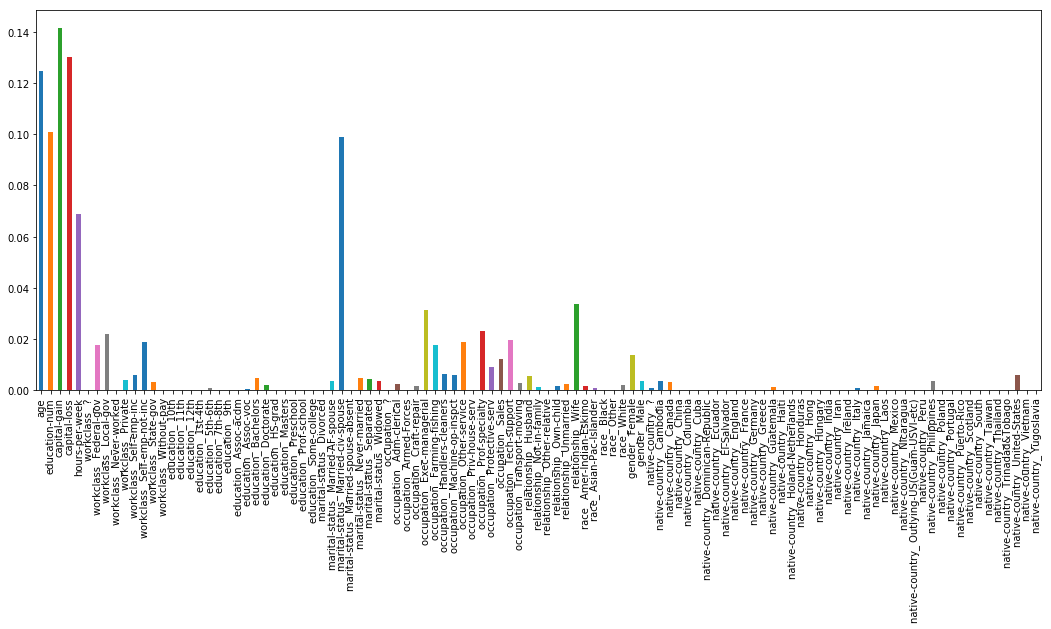

In [79]:
pd.Series(gb.feature_importances_, index=X_train.columns).plot.bar(figsize=(18,7))

## Ranking features

The forest of simple trees helps reduce overfitting, but the decisions are less easy to understand since the decision boundaries are determined by *soft voting* where regions overlap.

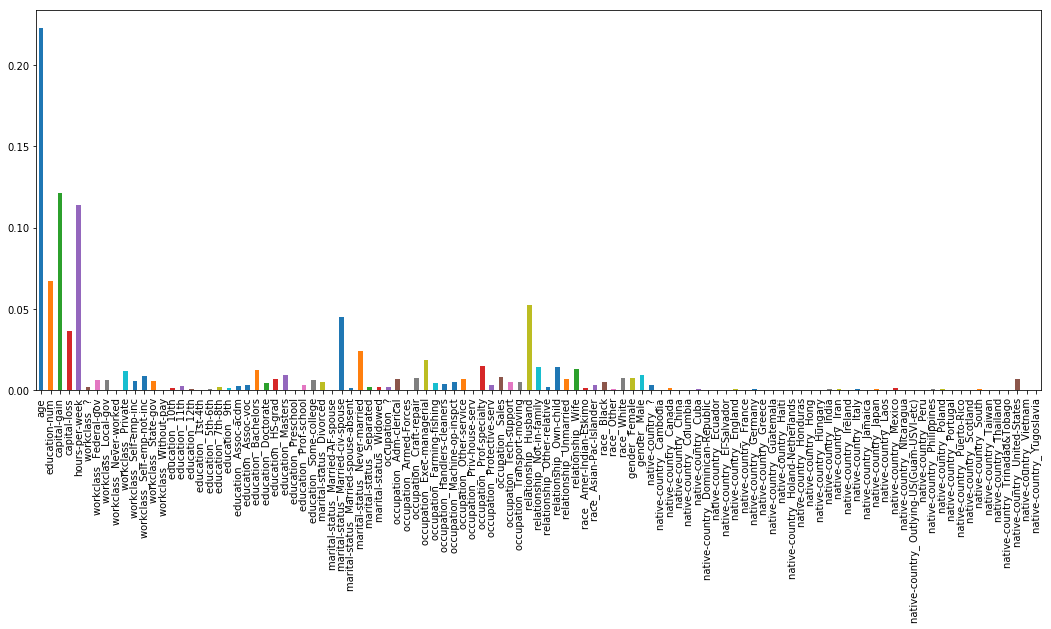

In [80]:
pd.Series(rnd.feature_importances_, index=X_train.columns).plot.bar(figsize=(18,7))

# Regression problems

Decision trees are built by making divisions along a feature 

The dividing lines are optimized to reduce prediction errors to the training values.

These separate dividing lines allow for *non-linear* responses to be trained.

In [ ]:
auto = pd.read_csv('data/auto-mpg.csv')
auto.head()

In [ ]:
X = auto[['cyl','displ','hp','weight','accel']]
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Caution**

Decision tree regressors cannot *extrapolate* data. They are best used to predict new values within the range of training features.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(random_state=0, max_depth=2)

features = ['hp']

tree.fit(X_train[features], y_train)
tree.score(X_test[features], y_test)

The terminal leaves in the graph show the target value associated with each decision path.

The predicted value of the region for each terminal leaf is the mean value of the training target.

In [ ]:
export_graphviz(tree, feature_names=features,
                out_file='tmp/auto.dot', impurity=False, filled=True)
subprocess.check_call([sys.prefix+'/bin/dot','-Tpng','tmp/auto.dot','-o','tmp/auto.png'])
Image('tmp/auto.png')

## Complexity vs generality

As the max_depth increases the model can easily *memorize* the training data and become incapable of making accurate predictions over the test data.

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(20,8))

for ax, depth in zip(axes, [2, 4, 8]):
    tree = DecisionTreeRegressor(random_state=0, max_depth=depth)
    
    tree.fit(X_train[['hp']], y_train)
    tree.score(X_test[['hp']], y_test)
    
    auto.plot.scatter(x='hp', y='mpg', ax=ax)
    s = X.sort_values('hp')
    ax.plot(s['hp'], tree.predict(s[['hp']]), c='red')
    ax.set_title('max_depth={}'.format(depth))

## Ensembles

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
houses = pd.DataFrame(boston.data, columns=boston.feature_names)
houses['price'] = boston.target

X = houses.drop('price',axis='columns')
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

When training on multiple features a division is made in only one dimension at a time.

This can be used to aid in *feature selection*.

This model is intentionally overfit.

In [ ]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

The relative *importance* of a feature is a measure of its predictive power.

**Caution**

In the case of co-linear features only one will be usually have a high important since adding a decision node in the second feature makes little difference.

In [ ]:
pd.Series(tree.feature_importances_, index=boston.feature_names).plot.bar(figsize=(18,7))

The Random Forest improves the accuracy without having to aggressively tune parameters.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor(n_estimators=10, random_state=0)
rnd.fit(X_train, y_train)
rnd.score(X_test, y_test)

In [ ]:
pd.Series(rnd.feature_importances_, index=boston.feature_names).plot.bar(figsize=(18,7))

And finally Gradient Boosting has improved the score a bit further.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

In [ ]:
pd.Series(gbr.feature_importances_, index=boston.feature_names).plot.bar(figsize=(18,7))

<img src='img/copyright.png'>